In [1]:
%matplotlib inline
from pandas.io.json import json_normalize
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))

In [2]:
import string
from operator import itemgetter 
import requests

In [3]:
from collections import defaultdict

In [4]:
from underthesea import word_tokenize, sent_tokenize

In [5]:
text_list = ['france', 'spain', 'spain beaches', 'france beaches', 'spain best beaches']

In [6]:
convention_df = pd.read_json('data.json')

In [7]:
convention_df.head()

,Tên Người Post,Nội dung Post,Ngày Đăng,Số cảm xúc,Số bình luận,Các bình luận
0,Nguyên Nguyên,Mng check dùm em phát. Mai em cho lên đường lu...,2020-05-12 07:19:00,2,6,"[{'UserName': 'Quân Phan', 'ContentComment': '..."
1,Nguyễn Thị Lê,Admin đính chính hộ với ạ. Hoang mang quá😭,2020-05-12 07:20:00,2,3,"[{'UserName': 'Trần Công Toàn', 'ContentCommen..."
2,Minh Triệu,"Cho em hỏi, e gửi hồ sơ từ tuần trước, làm sao...",2020-05-12 07:24:00,0,0,[]
3,Thanh Trúc,Mọi người cho em xin miếng review về ngành cnt...,2020-05-12 07:19:00,1,1,"[{'UserName': 'Văn Nam', 'ContentComment': 'Ni..."
4,Phương Quỳnh,Em chào mn ak. Cho e hỏi là nộp tiền nguyện vọ...,2020-05-10 19:37:00,10,6,"[{'UserName': 'Huỳnh Ngọc Thiên Vũ', 'ContentC..."


In [8]:
convention_df.iloc[0]

Tên Người Post                                        Nguyên Nguyên
Nội dung Post     Mng check dùm em phát. Mai em cho lên đường lu...
Ngày Đăng                                       2020-05-12 07:19:00
Số cảm xúc                                                        2
Số bình luận                                                      6
Các bình luận     [{'UserName': 'Quân Phan', 'ContentComment': '...
Name: 0, dtype: object

In [9]:
#convention_df2 = json_normalize(convention_df, 'Tên Người Post',[ 'id','Nội dung Post','Ngày Đăng', 'Số cảm xúc','Số bình luận','Các bình luận'])

In [10]:
convention_df.columns

Index(['Tên Người Post', 'Nội dung Post', 'Ngày Đăng', 'Số cảm xúc',
       'Số bình luận', 'Các bình luận'],
      dtype='object')

In [11]:
convention_df.drop('Tên Người Post',1)

,Nội dung Post,Ngày Đăng,Số cảm xúc,Số bình luận,Các bình luận
0,Mng check dùm em phát. Mai em cho lên đường lu...,2020-05-12 07:19:00,2,6,"[{'UserName': 'Quân Phan', 'ContentComment': '..."
1,Admin đính chính hộ với ạ. Hoang mang quá😭,2020-05-12 07:20:00,2,3,"[{'UserName': 'Trần Công Toàn', 'ContentCommen..."
2,"Cho em hỏi, e gửi hồ sơ từ tuần trước, làm sao...",2020-05-12 07:24:00,0,0,[]
3,Mọi người cho em xin miếng review về ngành cnt...,2020-05-12 07:19:00,1,1,"[{'UserName': 'Văn Nam', 'ContentComment': 'Ni..."
4,Em chào mn ak. Cho e hỏi là nộp tiền nguyện vọ...,2020-05-10 19:37:00,10,6,"[{'UserName': 'Huỳnh Ngọc Thiên Vũ', 'ContentC..."
...,...,...,...,...,...
496,[Share] Danh sách các trường sử dụng kết quả k...,2020-05-01 20:04:00,33,0,[]
497,Mọi người ai làm xong hồ sơ xét tuyển học bạ v...,2020-05-01 06:54:00,21,11,"[{'UserName': 'Nguyễn Ngọc Xuân Trúc', 'Conten..."
498,Anh chị có thể review về ngành Luật Kinh Tế đư...,2020-04-30 22:20:00,23,6,"[{'UserName': 'TN Mânn', 'ContentComment': 'Mì..."
499,Mình Khảo sát xem tình hình ntn để sắp xếp nv ...,2020-05-01 00:21:00,39,10,"[{'UserName': 'Đặng Văn Khải', 'ContentComment..."


In [12]:
top_cmt = convention_df

In [13]:
top_cmt.sort_values('Số bình luận', ascending = False)

,Tên Người Post,Nội dung Post,Ngày Đăng,Số cảm xúc,Số bình luận,Các bình luận
27,Nguyễn Văn Khánh,CÁC BẠN ĐỌC KĨ TỪNG NỘI DUNG VÀ TÌM THEO LINK ...,2020-04-29 07:44:00,356,456,"[{'UserName': 'Kiều Trang', 'ContentComment': ..."
15,Phan Thụy Vân Anh,Mong được may mắn gặp các bạn tại IUH nhé ❤️\n...,2020-05-03 07:20:00,409,373,"[{'UserName': 'Thu Ngân', 'ContentComment': 'b..."
168,www.facebook.com/groups/IUH2020,HƯỚNG DẪN CÁCH CHUẨN BỊ HỒ SƠ XÉT TUYỂN BẰNG H...,2020-04-22 00:33:00,240,270,"[{'UserName': 'Nhã Trần', 'ContentComment': 'A..."
196,Trần Công Toàn,"Lâu lâu, tranh thủ vô hỏi nè mọi người 😅",2020-04-30 03:19:00,162,259,"[{'UserName': 'Dương Tử', 'ContentComment': 'L..."
256,Bùi Phương Đông,Anh chị xem em có sai xót gì không ạ,2020-04-28 08:31:00,138,244,"[{'UserName': 'Trần Thị Thu Huệ', 'ContentComm..."
...,...,...,...,...,...,...
237,Danh Thị Ngọc Sa,"xin chào mọi người, mình 2k1 muốn xét tuyển và...",2020-05-08 00:42:00,6,0,[]
142,Nguyễn Thảo Ngân,Anh chị ơi cho em hỏi là phiếu xét tuyển có 2 ...,2020-05-10 05:03:00,6,0,[]
136,Trần Quỳnh,xin chào các bạn và anh chị e có 1 vấn đề : lú...,2020-05-10 06:36:00,0,0,[]
116,Bảo Nhi,trong đây có ai chọn xét tuyển bằng cách thi T...,2020-05-10 20:02:00,4,0,[]


In [14]:
top_camxuc = top_cmt.sort_values('Số cảm xúc', ascending = False)

In [15]:
top_camxuc.head(100)

,Tên Người Post,Nội dung Post,Ngày Đăng,Số cảm xúc,Số bình luận,Các bình luận
15,Phan Thụy Vân Anh,Mong được may mắn gặp các bạn tại IUH nhé ❤️\n...,2020-05-03 07:20:00,409,373,"[{'UserName': 'Thu Ngân', 'ContentComment': 'b..."
137,Nguyễn Văn Khánh,""" Chú muốn chính tay mình hoàn thành hồ sơ cho...",2020-05-08 22:09:00,363,25,"[{'UserName': 'Trần Nguyễn Hồng Ngọc', 'Conten..."
27,Nguyễn Văn Khánh,CÁC BẠN ĐỌC KĨ TỪNG NỘI DUNG VÀ TÌM THEO LINK ...,2020-04-29 07:44:00,356,456,"[{'UserName': 'Kiều Trang', 'ContentComment': ..."
82,Võ Hoàng Hơn,Hy vọng sẽ gặp may mắn 🤣😜\nCông nghệ ô tô cho ...,2020-05-05 00:46:00,247,237,"[{'UserName': 'Ngọc Vy', 'ContentComment': 'Đi..."
168,www.facebook.com/groups/IUH2020,HƯỚNG DẪN CÁCH CHUẨN BỊ HỒ SƠ XÉT TUYỂN BẰNG H...,2020-04-22 00:33:00,240,270,"[{'UserName': 'Nhã Trần', 'ContentComment': 'A..."
...,...,...,...,...,...,...
75,Tường Vy,🙏🙏Hy Vọng 🍀,2020-05-10 04:33:00,51,22,"[{'UserName': 'Bao Phan', 'ContentComment': 'C..."
68,Đào Công Thành,Mấy anh chị ơi cho em hỏi có điểm chuẩn xét họ...,2020-05-11 20:41:00,50,5,"[{'UserName': 'Nguyễn Đình Thi', 'ContentComme..."
282,Lê Thị Ánh Tuyết,Mấy ac xem giúp e z đc chưa ạ!,2020-05-06 06:24:00,50,28,"[{'UserName': 'Võ Quang Linh', 'ContentComment..."
119,Xuân Ngọc,Em viết phiếu đăng kí xét tuyển bằng bút mực đ...,2020-05-09 23:42:00,49,13,"[{'UserName': 'Nguyễn Văn Khánh', 'ContentComm..."


In [16]:
top_cmt[top_cmt['Nội dung Post'].str.contains('điểm | điểm', case=False)].head(10)

,Tên Người Post,Nội dung Post,Ngày Đăng,Số cảm xúc,Số bình luận,Các bình luận
7,Nguyễn Hoàng Duy Khang,Học bạ em bên 12 hk có chữ kí + dấu giáp lai.N...,2020-05-12 07:19:00,1,0,[]
23,Linh Tobi,Admin ơi cho em hỏi là nếu xét học bạ ko đậu t...,2020-05-12 05:47:00,13,3,"[{'UserName': 'Nguyễn Hải Đăng', 'ContentComme..."
27,Nguyễn Văn Khánh,CÁC BẠN ĐỌC KĨ TỪNG NỘI DUNG VÀ TÌM THEO LINK ...,2020-04-29 07:44:00,356,456,"[{'UserName': 'Kiều Trang', 'ContentComment': ..."
36,Thái Bình,Cho em hỏi một ngành của trường xét điểm nhiều...,2020-05-08 02:47:00,34,33,"[{'UserName': 'Chí Hiếu', 'ContentComment': 'H..."
42,Tuyết Nga,Mọi người cho e hỏi xét học bạ có đc cộng điểm...,2020-05-12 04:01:00,10,2,"[{'UserName': 'Trung', 'ContentComment': 'Kb'}..."
45,VP LZ,"Mn cho e hỏi, điểm ưu tiên khu vực là xét theo...",2020-05-10 05:55:00,35,18,"[{'UserName': 'Nguyễn Văn Khánh', 'ContentComm..."
50,Hải Đăng,Anh chị có ai biết chổ nào tư vấn tuyển sinh d...,2020-05-11 06:01:00,20,18,"[{'UserName': 'Huỳnh Nguyễn Phương Hoa', 'Cont..."
68,Đào Công Thành,Mấy anh chị ơi cho em hỏi có điểm chuẩn xét họ...,2020-05-11 20:41:00,50,5,"[{'UserName': 'Nguyễn Đình Thi', 'ContentComme..."
79,Triệu Vy,"Em muốn học ngành ngôn ngữ anh, quan hệ quốc t...",2020-05-11 04:34:00,56,27,"[{'UserName': 'Lý Ngọc Phương Trinh', 'Content..."
92,Trần Nhân Nghĩa,Anh chị cho em xin link tính điểm xét tuyển vs...,2020-05-11 02:14:00,13,6,"[{'UserName': 'Trần Ngọc Hân', 'ContentComment..."


In [17]:
top_cmt['Nội dung Post'].str.split(expand=True).stack().value_counts()

em      472
có      376
ạ       306
hỏi     266
học     265
       ... 
4.0,      1
🙏🙏Hy      1
Là        1
Hảo,      1
lĩnh      1
Length: 2655, dtype: int64

In [18]:
text_list = ['điểm', 'ngành', 'môn', 'học phí', 'chọn ngành']
word_freq = defaultdict(lambda: [0, 0])
num_list  = [200, 180, 170, 160, 160]
for text, num in zip(text_list, num_list): 
    for word in text.split(): 

        word_freq[word][0] += 1 
        # new line, incrementing the numeric value for each word
        word_freq[word][1] += num       
    columns = {0: 'abs_freq', 1: 'wtd_freq'}        

In [19]:
def word_frequency(text_list, num_list, sep=None, rm_words=('hk', 'hc', 'a')):
    word_freq = defaultdict(lambda: [0, 0])

    for text, num in zip(text_list, num_list):
        for word in text.split(sep=sep): 
            if word.lower() in rm_words:  
                continue       
                
            word_freq[word][0] += 1 
            word_freq[word][1] += num
            
    columns = {0: 'abs_freq', 1: 'wtd_freq'}

    abs_wtd_df = (pd.DataFrame.from_dict(word_freq, orient='index')
                 .rename(columns=columns )
                 .sort_values('wtd_freq', ascending=False)
                 .assign(rel_value=lambda df: df['wtd_freq'] / df['abs_freq']).round())

    abs_wtd_df.insert(1, 'abs_perc', value=abs_wtd_df['abs_freq'] / abs_wtd_df['abs_freq'].sum())
    abs_wtd_df.insert(2, 'abs_perc_cum', abs_wtd_df['abs_perc'].cumsum())
    abs_wtd_df.insert(4, 'wtd_freq_perc', abs_wtd_df['wtd_freq'] / abs_wtd_df['wtd_freq'].sum())
    abs_wtd_df.insert(5, 'wtd_freq_perc_cum', abs_wtd_df['wtd_freq_perc'].cumsum())

    return abs_wtd_df      

In [20]:
 word_freq_df =  word_frequency(top_cmt['Nội dung Post'], 
                               top_cmt['Số bình luận'],
                               rm_words=['ạ','em', 'e', 'à', 'và', 'cho', 
                                         'cảm', 'ơn', 'chị', 'ý', 'ak', 'ko',
                                         'mn', 'r'])
word_frequency(top_cmt['Nội dung Post'], top_cmt['Số bình luận']).head(50)         

,abs_freq,abs_perc,abs_perc_cum,wtd_freq,wtd_freq_perc,wtd_freq_perc_cum,rel_value
có,376,0.018987,0.018987,15653,0.014579,0.014579,42.0
em,472,0.023835,0.042822,15387,0.014331,0.028910,33.0
các,163,0.008231,0.051053,14256,0.013278,0.042188,87.0
của,172,0.008686,0.059738,10409,0.009695,0.051883,61.0
là,228,0.011513,0.071252,9674,0.009010,0.060893,42.0
số,75,0.003787,0.075039,9481,0.008830,0.069723,126.0
học,265,0.013382,0.088421,8686,0.008090,0.077813,33.0
và,156,0.007878,0.096299,8611,0.008020,0.085833,55.0
người,143,0.007221,0.103520,8398,0.007822,0.093655,59.0
bạn,93,0.004696,0.108216,8245,0.007679,0.101334,89.0


In [21]:
import matplotlib.pyplot as plt

KeyError: 'word'

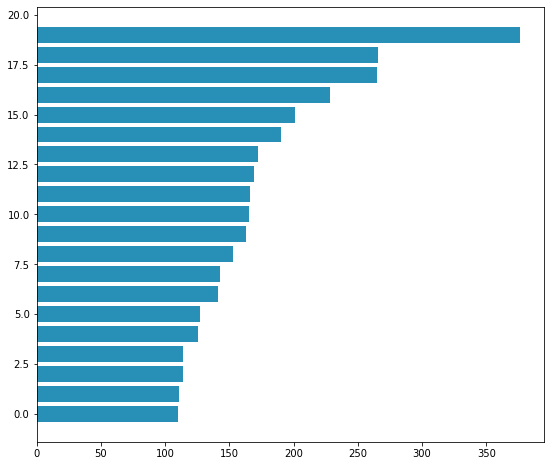

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)

word_freq_df_abs = word_freq_df.sort_values('abs_freq', ascending=False).reset_index()

plt.barh(range(20),
         list(reversed(word_freq_df_abs['abs_freq'][:20])), color='#288FB7')
for i, word in enumerate(word_freq_df_abs['word'][:20]):
    plt.text(word_freq_df_abs['abs_freq'][i], 20-i-1, 
             s=str(i+1) + '. ' + word + ': '  + str(word_freq_df_abs['abs_freq'][i]),
             ha='right', va='center', fontsize=14, color='white', fontweight='bold')

plt.vlines(range(0, 210, 10), -1, 20, colors='gray', alpha=0.1)
plt.hlines(range(0, 20, 2), 0, 210, colors='gray', alpha=0.1)
plt.yticks([])
plt.xticks([])
plt.title('Tần suất số từ được sử dụng.', fontsize=22, fontweight='bold')